In [37]:
############################################################################
# 1. tensorflow 및 keras, numpy 등 모듈 import
############################################################################

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)
print('[1] Python version : ', sys.version)
print('[2] TensorFlow version : ', tf.__version__)
print('[3] Keras version : ', keras.__version__)


[1] Python version :  3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]
[2] TensorFlow version :  2.1.0
[3] Keras version :  2.3.1


In [38]:
############################################################################
# 2. keras에서 제공하는 mnist 데이터를 받고, 사용할 수 있게 train과 test 데이터 생성
############################################################################

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('[4] x_train shape:', x_train.shape)
print('[5] x_train shape[0]: {} train samples'.format(x_train.shape[0]))
print('[6] x_test shape[0]: {} test samples'.format(x_test.shape[0]) )

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


[4] x_train shape: (60000, 28, 28, 1)
[5] x_train shape[0]: 60000 train samples
[6] x_test shape[0]: 10000 test samples


In [39]:
############################################################################
# 3. CNN 구조 생성
############################################################################
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

In [40]:
############################################################################
# 4. 학습시작
############################################################################
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('[7] Test loss:', score[0])
print('[8] Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1941 - accuracy: 0.9403 - val_loss: 0.0485 - val_accuracy: 0.9841

In [41]:
############################################################################
# 5. 모델 저장
############################################################################
model.save("C:\data\MNIST_CNN_model_h5")



In [42]:
############################################################################
# 6. 모델 불러오기
############################################################################
from keras.models import load_model
model = load_model('C:\data\MNIST_CNN_model_h5')

[9] The Answer is  [3]
[10] The Answer is  [3]


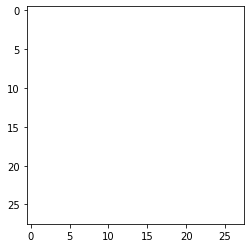

In [60]:
############################################################################
# 7. OpenCV, numpy, matplotlib 불러오기
############################################################################
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_num = plt.imread('C:\data\sample\img1.png')

# 0번째 프레임 복사(BGR)
test_num = test_num[:,:,0]

# 흑백 구분(127보다 크면 255 표시)
ret, test_num = cv2.threshold(test_num, 127, 255, cv2.THRESH_BINARY_INV)
test_num = (test_num > 125) * test_num
test_num = test_num.astype('float32') / 255

plt.imshow(test_num, cmap='Greys', interpolation='nearest')

test_num = test_num.reshape((1, 28, 28, 1))
# print(test_num)
print('[9] The Answer is ', model.predict_classes(test_num))


test_num = plt.imread('C:\data\sample\img9.png')

# 0번째 프레임 복사(BGR)
test_num = test_num[:,:,0]

# 흑백 구분(127보다 크면 255 표시)
ret, test_num = cv2.threshold(test_num, 127, 255, cv2.THRESH_BINARY_INV)
test_num = (test_num > 125) * test_num
test_num = test_num.astype('float32') / 255

plt.imshow(test_num, cmap='Greys', interpolation='nearest')

test_num = test_num.reshape(1, 28, 28, 1)
# print(test_num)
print('[10] The Answer is ', model.predict_classes(test_num))


